<a href="https://colab.research.google.com/github/HenryZumaeta/py4cd_EPC2025/blob/main/C10/C10_Script01_MatplotlibAvanzado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Creamos un directorio oculto y un archivo dentro de ese directorio oculto
!mkdir ~/.kaggle
!touch ~/.kaggle/kaggle.json

# Creamos un diccionario para almacenar el usuario de nuestra cuenta en Kaggle
# y la correspondinte token
api_token = {"username":"xxxxxxx","key":"xxxxxxx"}

# Mandamos el diccionario api_token a disco duro (kaggle.json)
import json
with open('/root/.kaggle/kaggle.json', 'w') as file:
    json.dump(api_token, file)

# Permisos
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
# Descargamos y descomprimimos un dataset: https://www.kaggle.com/datasets/robintux/crime-data-from-2020-to-present-19112025
!kaggle datasets download robintux/crime-data-from-2020-to-present-19112025 --unzip

Dataset URL: https://www.kaggle.com/datasets/robintux/crime-data-from-2020-to-present-19112025
License(s): apache-2.0
  0% 0.00/52.9M [00:00<?, ?B/s]
100% 52.9M/52.9M [00:00<00:00, 1.45GB/s]


In [4]:
# Módulos y datos
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

crime_la = pd.read_csv('crime_los_angeles.csv')
crime_la.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1004991 entries, 0 to 1004990
Data columns (total 29 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   Unnamed: 0      1004991 non-null  int64  
 1   dr_no           1004991 non-null  int64  
 2   date_rptd       1004991 non-null  object 
 3   date_occ        1004991 non-null  object 
 4   time_occ        1004991 non-null  int64  
 5   area            1004991 non-null  int64  
 6   area_name       1004991 non-null  object 
 7   rpt_dist_no     1004991 non-null  int64  
 8   part_1_2        1004991 non-null  int64  
 9   crm_cd          1004991 non-null  int64  
 10  crm_cd_desc     1004991 non-null  object 
 11  mocodes         853372 non-null   object 
 12  vict_age        1004991 non-null  int64  
 13  vict_sex        860347 non-null   object 
 14  vict_descent    860335 non-null   object 
 15  premis_cd       1004975 non-null  float64
 16  premis_desc     1004403 non-null  ob

In [7]:
# Eliminar la columna: Unnamed: 0
# crime_la.drop("Unnamed: 0", axis = 1, inplace = True)
crime_la = crime_la.drop("Unnamed: 0", axis = 1)

# Valores faltantes por columna
crime_la.isna().sum().sort_values(ascending = False)*100/crime_la.shape[0]

,0
crm_cd_4,99.993632
crm_cd_3,99.769749
crm_cd_2,93.118346
cross_street,84.652997
weapon_used_cd,67.437818
weapon_desc,67.437818
mocodes,15.086603
vict_descent,14.393761
vict_sex,14.392567
premis_desc,0.058508


# ANÁLISIS **UNIVARIADO**

**Objetivos**
- Comprender la distribución y frecuencia de los eventos criminales.
- Identificar valores atípicos, valores faltantes e incosistencias.
- Detectar posibles sesgos o limitaciones en la recolección de datos.
- Generar hipótesis iniciales sobre factores asociados al crimen.
- Preparar el terreno para análisis inferenciales, espaciales y predictivos.


## Estrategia Metodológica

Este análisis se dividirá en tres bloques según el tipo de variable

- Variables Categóricas (Nominales y Ordinales)
- Variables Numéricas o Cuantitativas (Discretas y Continuas)
- Variables Temporales
- Variables Espaciales

In [8]:
crime_la.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1004991 entries, 0 to 1004990
Data columns (total 28 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   dr_no           1004991 non-null  int64  
 1   date_rptd       1004991 non-null  object 
 2   date_occ        1004991 non-null  object 
 3   time_occ        1004991 non-null  int64  
 4   area            1004991 non-null  int64  
 5   area_name       1004991 non-null  object 
 6   rpt_dist_no     1004991 non-null  int64  
 7   part_1_2        1004991 non-null  int64  
 8   crm_cd          1004991 non-null  int64  
 9   crm_cd_desc     1004991 non-null  object 
 10  mocodes         853372 non-null   object 
 11  vict_age        1004991 non-null  int64  
 12  vict_sex        860347 non-null   object 
 13  vict_descent    860335 non-null   object 
 14  premis_cd       1004975 non-null  float64
 15  premis_desc     1004403 non-null  object 
 16  status          1004990 non-null  ob

### Variables Categóricas

#### area y area_name
- Conteo de frecuencias (absolutas y relativas)
- Verificar si hay áreas con muy pocos registros (analizar si existe un no reporteo o en todo caso una baja densidad de crímenes).
- Si se consiguiera datos con población (dato externo) se podría comparar por área.

<Axes: title={'center': 'Top10 áreas por número de crímenes'}, xlabel='area_name'>

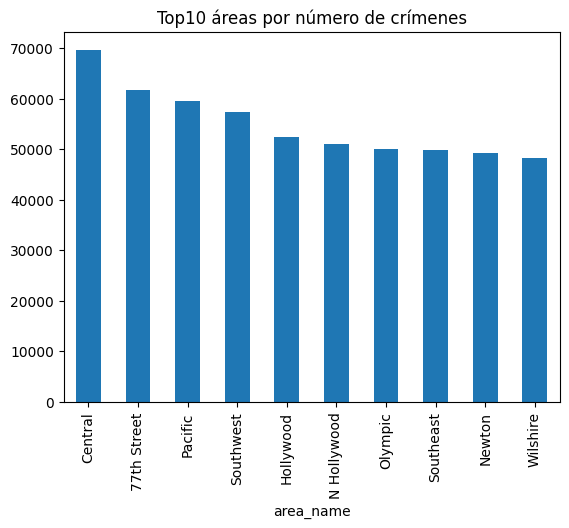

In [12]:
crime_la["area_name"].value_counts().head(10).plot(kind = "bar", title = "Top10 áreas por número de crímenes")

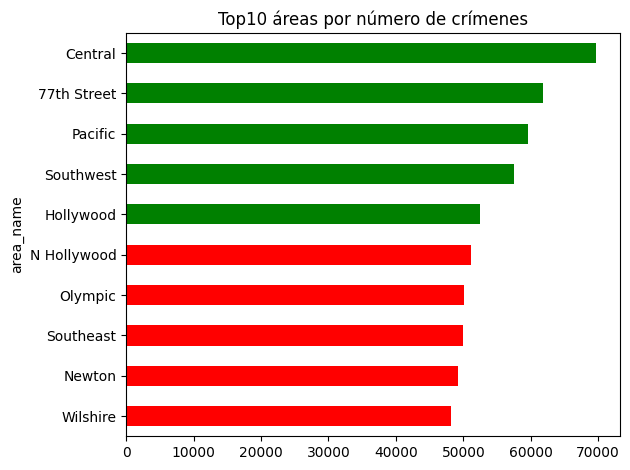

In [14]:
# Pintemos de color verde a las 5 barras de mayor longitud y de color rojo a las 5 restantes

# Obtener las 10 primeras áreas
top_10 = crime_la["area_name"].value_counts().head(10)

# Definamos una lista para los colores de las barras
colors = ["green" if i < 5 else "red" for i in range(len(top_10))]

# Creamos el gráfico de barras horizontales con colores personalizados
top_10.plot(kind = "barh", title = "Top10 áreas por número de crímenes", color = colors)

# Opcional: Invertir el eje Y para que la barra de mayor longitud esté arriba
plt.gca().invert_yaxis()

# Fin
plt.tight_layout()
plt.show()

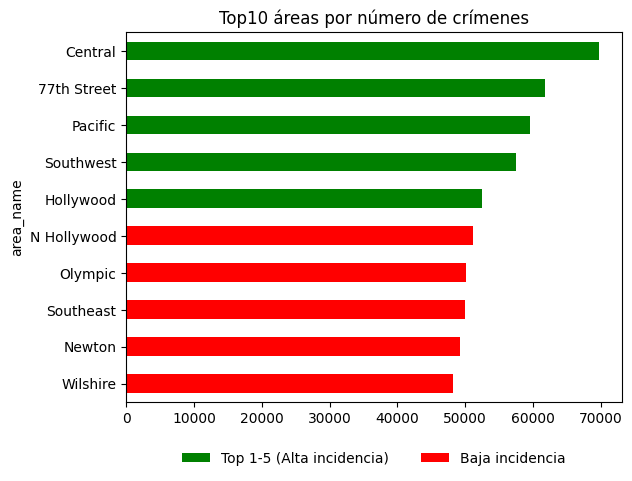

In [16]:
# Agregar una leyenda personalizada para explicar la naturaleza de los colores de las barras

from matplotlib.patches import Patch

# Ya tengo los datos: top_10
# Ya tengo los colores: colors

ax = top_10.plot(kind = "barh", title = "Top10 áreas por número de crímenes", color = colors)

# Invertimos el eje Y para que la barra de mayor longitud esté arriba
ax.invert_yaxis()

# Crear una leyenda personalizada
legend_elements = [
    Patch(facecolor = "green", label = "Top 1-5 (Alta incidencia) "),
    Patch(facecolor = "red", label = "Baja incidencia")
    ]

# Agregamos esta leyenda al objeto ax
# ax.legend(handles = legend_elements, loc = "lower right")

# Necesitamos personalizar la ubicación/posición de esta leyenda
ax.legend(
    handles=legend_elements,
    loc = "upper center",
    bbox_to_anchor = (0.5, -0.1),
    ncol = 2,
    frameon = False,
    fontsize = 10
)


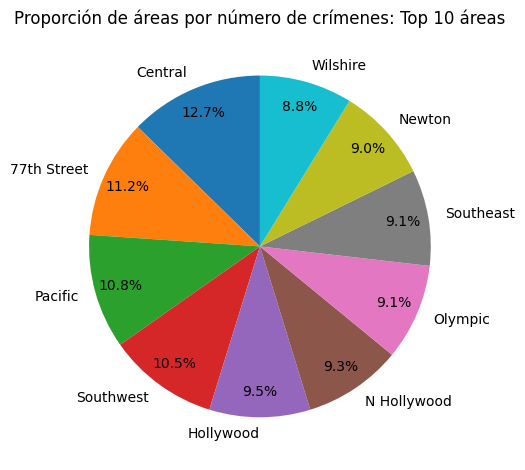

In [19]:
# Para mostrar las proporciones relativas: Diagrama de tipo pastel (pie) y de tipo donna (donut)

# Datos: top_10
plt.pie(top_10, labels = top_10.index, autopct = "%.1f%%", startangle = 90, pctdistance = 0.85)
plt.title("Proporción de áreas por número de crímenes: Top 10 áreas")

# Fin
plt.tight_layout()
plt.show()

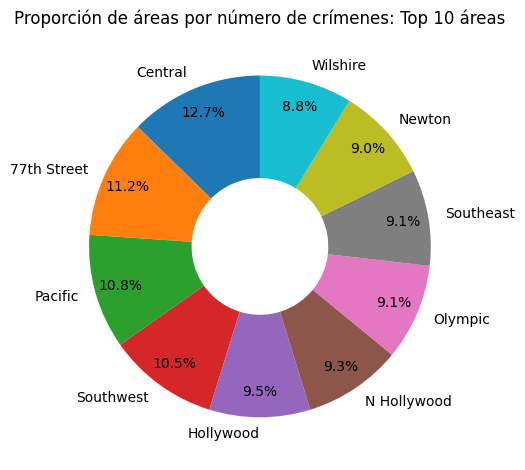

In [21]:
# Diagrama de donna
# Datos: top_10
plt.pie(top_10, labels = top_10.index, autopct = "%.1f%%", startangle = 90, pctdistance = 0.85, wedgeprops=dict(width = 0.6))
plt.title("Proporción de áreas por número de crímenes: Top 10 áreas")

# Fin
plt.tight_layout()
plt.show()

#### vict_sex y vict_descent

Por la variable `vict_sex` podemos obtener información de equidad

Por la variable `vict_descent` podemos obtener información de vulnerabilidad poblacional.

In [23]:
crime_la["vict_sex"].value_counts()

,count
vict_sex,
M,403879
F,358580
X,97773
H,114
-,1


In [24]:
# En base a la documentación del dataset:
# Decidimos solo considerar M, F y X

In [25]:
# Solo consideraremos a M, F y X como niveles de la variable vict_sex
crime_la.loc[crime_la.vict_sex.isin(["M", "F", "X"]), "vict_sex"].value_counts()

,count
vict_sex,
M,403879
F,358580
X,97773


<Axes: ylabel='count'>

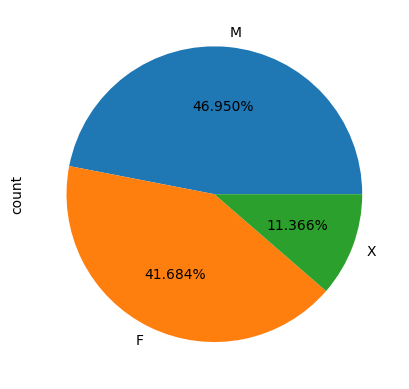

In [27]:
from enum import auto
crime_la.loc[crime_la.vict_sex.isin(["M", "F", "X"]), "vict_sex"].value_counts().plot(kind = "pie", autopct = "%.3f%%")

#### Análisis Bivariado: `premis_desc` y `weapon_desc`

Explorar la relación entre el tipo de lugar donde ocurre el crimen (`premis_desc`) y el tipo de arma utilizada (`weapon_desc`)

- Identificar patrones contextuales
- Detectar riesgos específicos por entorno

In [29]:
# 10 tipos de lugares con mayor número de crímenes
crime_la["premis_desc"].value_counts().head(10)

,count
premis_desc,
STREET,261284
SINGLE FAMILY DWELLING,163654
"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",119011
PARKING LOT,69147
OTHER BUSINESS,47647
SIDEWALK,40861
"VEHICLE, PASSENGER/TRUCK",29302
GARAGE/CARPORT,19362
DRIVEWAY,16082


In [30]:
# Top10 de armas más usadas (descripción)
crime_la["weapon_desc"].value_counts().head(10)

,count
weapon_desc,
"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",174761
UNKNOWN WEAPON/OTHER WEAPON,36390
VERBAL THREAT,23846
HAND GUN,20182
SEMI-AUTOMATIC PISTOL,7267
KNIFE WITH BLADE 6INCHES OR LESS,6838
UNKNOWN FIREARM,6582
OTHER KNIFE,5879
MACE/PEPPER SPRAY,3730


In [31]:
# Reducción de categorías (evitar "long tail")

# Top10 lugares más comunes
top_premis = crime_la["premis_desc"].value_counts().head(10).index

# Top8 armas más comunes
top_weapons = crime_la["weapon_desc"].value_counts().head(8).index

# Filtrar
df_filtered = crime_la[
    (crime_la["premis_desc"].isin(top_premis)) &
    (crime_la["weapon_desc"].isin(top_weapons))
]

df_filtered.shape

(221542, 28)

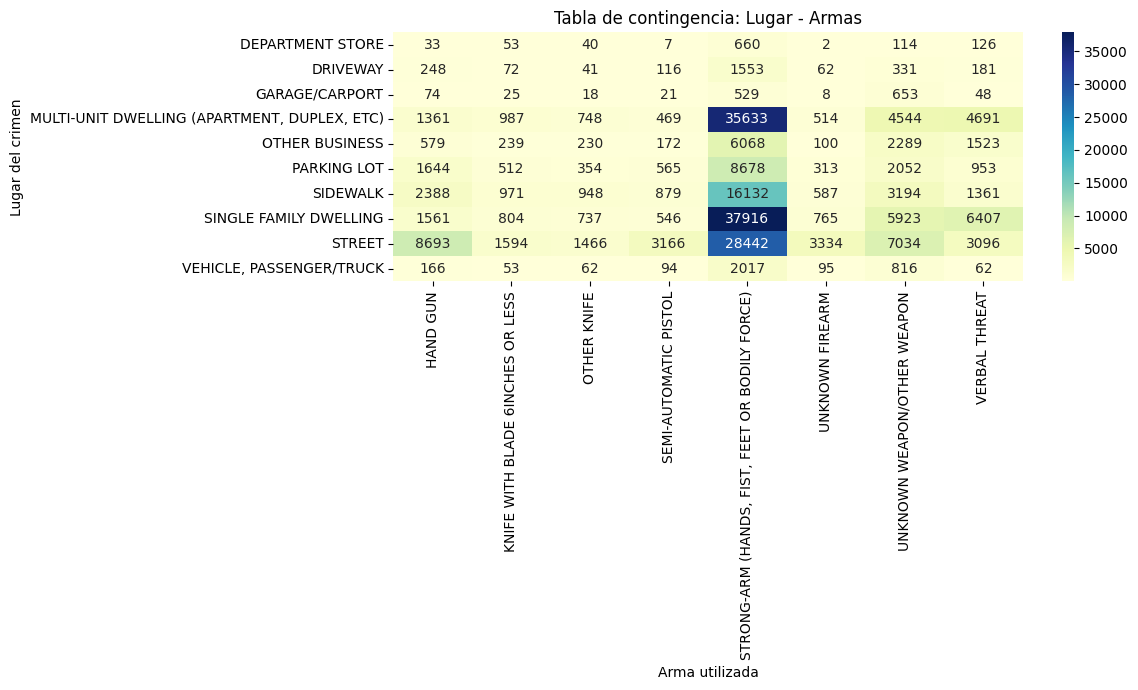

In [40]:
# Tabla de contingencia
contingency = pd.crosstab(df_filtered["premis_desc"], df_filtered["weapon_desc"])

# Heatmap
plt.figure(figsize = (12, 7))
sns.heatmap(data = contingency, annot = True, fmt = "d", cmap = "YlGnBu", cbar = True)
plt.title("Tabla de contingencia: Lugar - Armas")
plt.xlabel("Arma utilizada")
plt.ylabel("Lugar del crimen")

# Fin
plt.tight_layout()
plt.show()

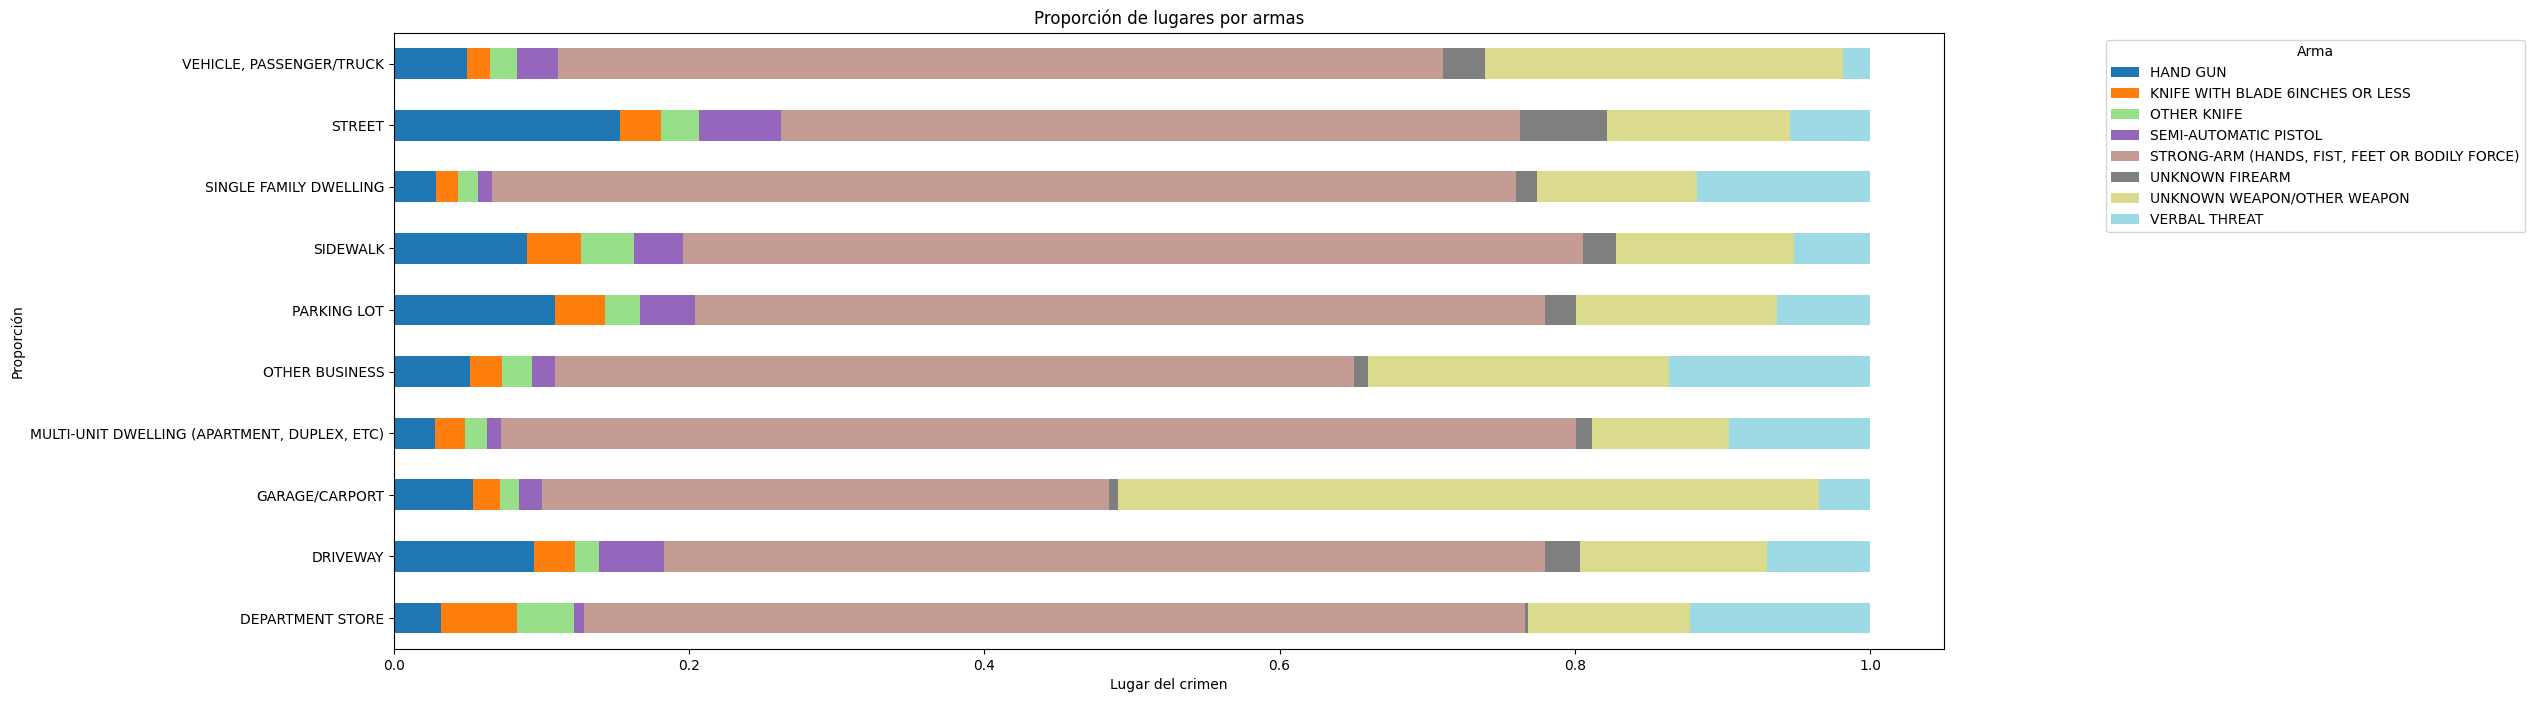

In [46]:
# Vamos a considerar un diagrama de barras apiladas para mostrar como porporción
# las dos variables de interés: premis_desc y weapon_desc

# Convertir a proporciones por fila (lugares)
contingency_norm = contingency.div(contingency.sum(axis = 1), axis = 0)
contingency_norm

# Gráfico
contingency_norm.plot(kind = "barh", stacked = True, figsize = (20, 8), colormap = "tab20")
plt.title("Proporción de lugares por armas")
plt.xlabel("Lugar del crimen")
plt.ylabel("Proporción")

# Modifiquemos la posición/ubicación de la leyenda
plt.legend(title = "Arma", bbox_to_anchor = (1.1, 1), loc = "upper left")

# Fin
# plt.tight_layout()
plt.show()

#### Análisis Bivariado: `status` y `status_desc`

In [49]:
# Valores únicos en status y status_desc
print("status: ",crime_la["status"].nunique())
print("status_desc: ",crime_la["status_desc"].nunique())

status:  6
status_desc:  6


In [50]:
# Tabla de contingencia: Cada código (status) tiene única descripción (status_desc)
pd.crosstab(crime_la["status"], crime_la["status_desc"])

status_desc,Adult Arrest,Adult Other,Invest Cont,Juv Arrest,Juv Other,UNK
status,,,,,,
AA,87155,0,0,0,0,0
AO,0,109802,0,0,0,0
CC,0,0,0,0,0,6
IC,0,0,802862,0,0,0
JA,0,0,0,3286,0,0
JO,0,0,0,0,1879,0


### Variables Numéricas

In [53]:
# Columna vict_age
crime_la["vict_age"]

,vict_age
0,31
1,32
2,30
3,47
4,63
...,...
1004986,35
1004987,11
1004988,16
1004989,17


In [54]:
# Descripción estadística de la columna vict_age
crime_la["vict_age"].describe()

,vict_age
count,1.004991e+06
mean,2.891706e+01
std,2.199272e+01
min,-4.000000e+00
25%,0.000000e+00
50%,3.000000e+01
75%,4.400000e+01
max,1.200000e+02


In [57]:
# Datos faltantes
crime_la.vict_age.isnull().sum()

np.int64(0)

In [58]:
# A qué edad de la víctima sufrió el crimen
crime_la.vict_age.value_counts()

,count
vict_age,
0,269222
30,22289
35,21836
31,21420
29,21345
...,...
98,71
-2,28
-3,6


In [59]:
# Veamos a los valores que compone a la columna vict_age
np.sort(crime_la.vict_age.unique())

array([ -4,  -3,  -2,  -1,   0,   2,   3,   4,   5,   6,   7,   8,   9,
        10,  11,  12,  13,  14,  15,  16,  17,  18,  19,  20,  21,  22,
        23,  24,  25,  26,  27,  28,  29,  30,  31,  32,  33,  34,  35,
        36,  37,  38,  39,  40,  41,  42,  43,  44,  45,  46,  47,  48,
        49,  50,  51,  52,  53,  54,  55,  56,  57,  58,  59,  60,  61,
        62,  63,  64,  65,  66,  67,  68,  69,  70,  71,  72,  73,  74,
        75,  76,  77,  78,  79,  80,  81,  82,  83,  84,  85,  86,  87,
        88,  89,  90,  91,  92,  93,  94,  95,  96,  97,  98,  99, 120])

In [61]:
# Filtrar edades fuera de un rango biológicamente plausible (0-119)
invalid_ages = crime_la[(crime_la.vict_age < 0) | (crime_la.vict_age >= 120)]["vict_age"]

print("Numero de edades fuera de un rango biológicamente plausible")
print(len(invalid_ages))

Numero de edades fuera de un rango biológicamente plausible
138


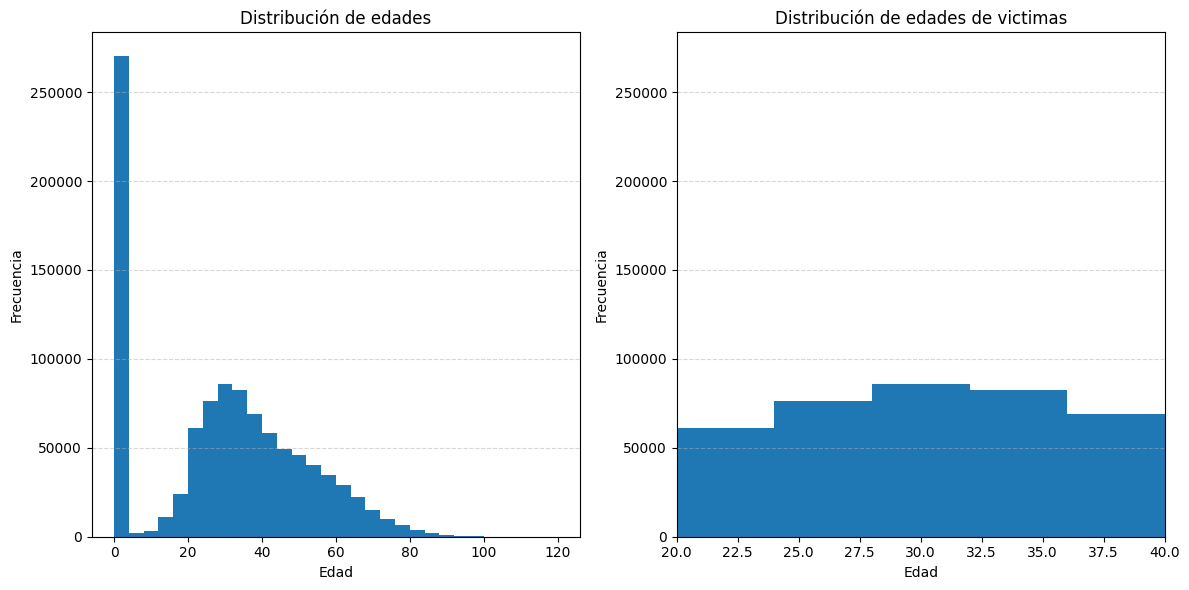

In [68]:
# Visualización de la distribución de edades
# Histograma

plt.figure(figsize=(12,6))

# Validación de edades
valid_ages = crime_la[
    (crime_la.vict_age >= 0) &
    (crime_la.vict_age <= 120)
]["vict_age"]

# Vamos a meter dos Axes en un figure

# Histograma para la data completa
plt.subplot(1, 2, 1)
plt.hist(valid_ages, bins = 30)
plt.grid(axis="y", linestyle = "--", alpha = 0.5)
plt.title("Distribución de edades")
plt.xlabel("Edad")
plt.ylabel("Frecuencia")


# Histograma para el rango de edad de [20, 40]
plt.subplot(1, 2, 2)
plt.hist(valid_ages, bins = 30)
plt.xlim(20,40)
plt.grid(axis="y", linestyle = "--", alpha = 0.5)
plt.title("Distribución de edades de victimas")
plt.xlabel("Edad")
plt.ylabel("Frecuencia")

# Fin
plt.tight_layout()
plt.show()

<Axes: xlabel='vict_age'>

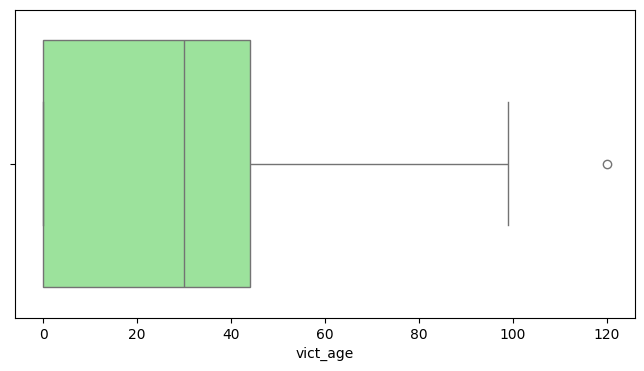

In [70]:
# Visualización de la distribución de edades de las víctimas
# Boxplot
plt.figure(figsize=(8,4))
sns.boxplot(x = valid_ages, color = "lightgreen")

### Variables Espaciales

In [77]:
# Verificar rango geográfico para los Ángeles
# Latitud: 33° a 35°
# Longitud: -119° a -118°

valid_lat = (crime_la["lat"] >= 33) & (crime_la["lat"] <= 35)

valid_lon = (crime_la.lon >= -119) & (crime_la.lon <= -118)

print("Total de registros: ", len(crime_la))

valid_geo = crime_la[valid_lat & valid_lon]

print("Coordenadas dentro del rando esperado: ", len(valid_geo))
print("Coordenadas inválidas: ", len(crime_la) - len(valid_geo))


Total de registros:  1004991
Coordenadas dentro del rando esperado:  1002751
Coordenadas inválidas:  2240


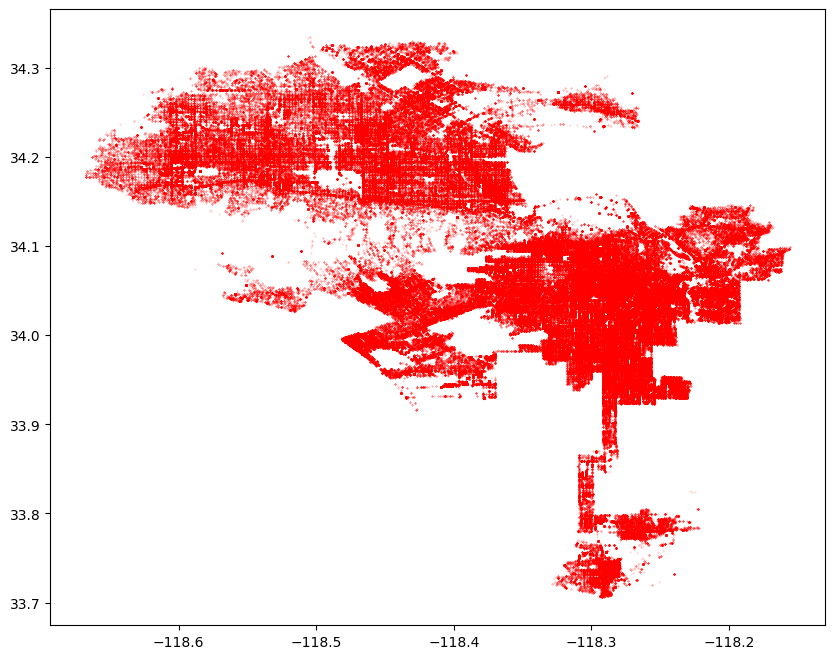

In [78]:
# Visualicemos los crímenes validados usando matplotlib
plt.figure(figsize=(10,8))
plt.scatter(valid_geo["lon"], valid_geo["lat"], s = 0.1, alpha= 0.3, color = "red")
plt.show()

In [80]:
# Mapa de calor interactivo: folium
import folium
from folium.plugins import HeatMap

# Tomemos una muestra (dataset tiene más de UN MILLON  de observaciones)
sample_size = 5000
sample_geo = valid_geo.sample(n = sample_size)

# Convertir a lista: [lat, lon]
heat_data = [[row["lat"], row["lon"]] for index, row in sample_geo.iterrows()]

# Crear un mapa centrado en los Ángeles
la = folium.Map(location = [34.0447, -118.2492], zoom_start=11)

# Agregamos una capa para el mapa de calor
HeatMap(heat_data, radius=10, blur=15, min_opacity=0.2).add_to(la)

# Mostrar el mapa
la